/tmp/ipykernel_3544643/2202446524.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')
/tmp/ipykernel_3544643/2202446524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')
/tmp/ipykernel_3544643/2202446524.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

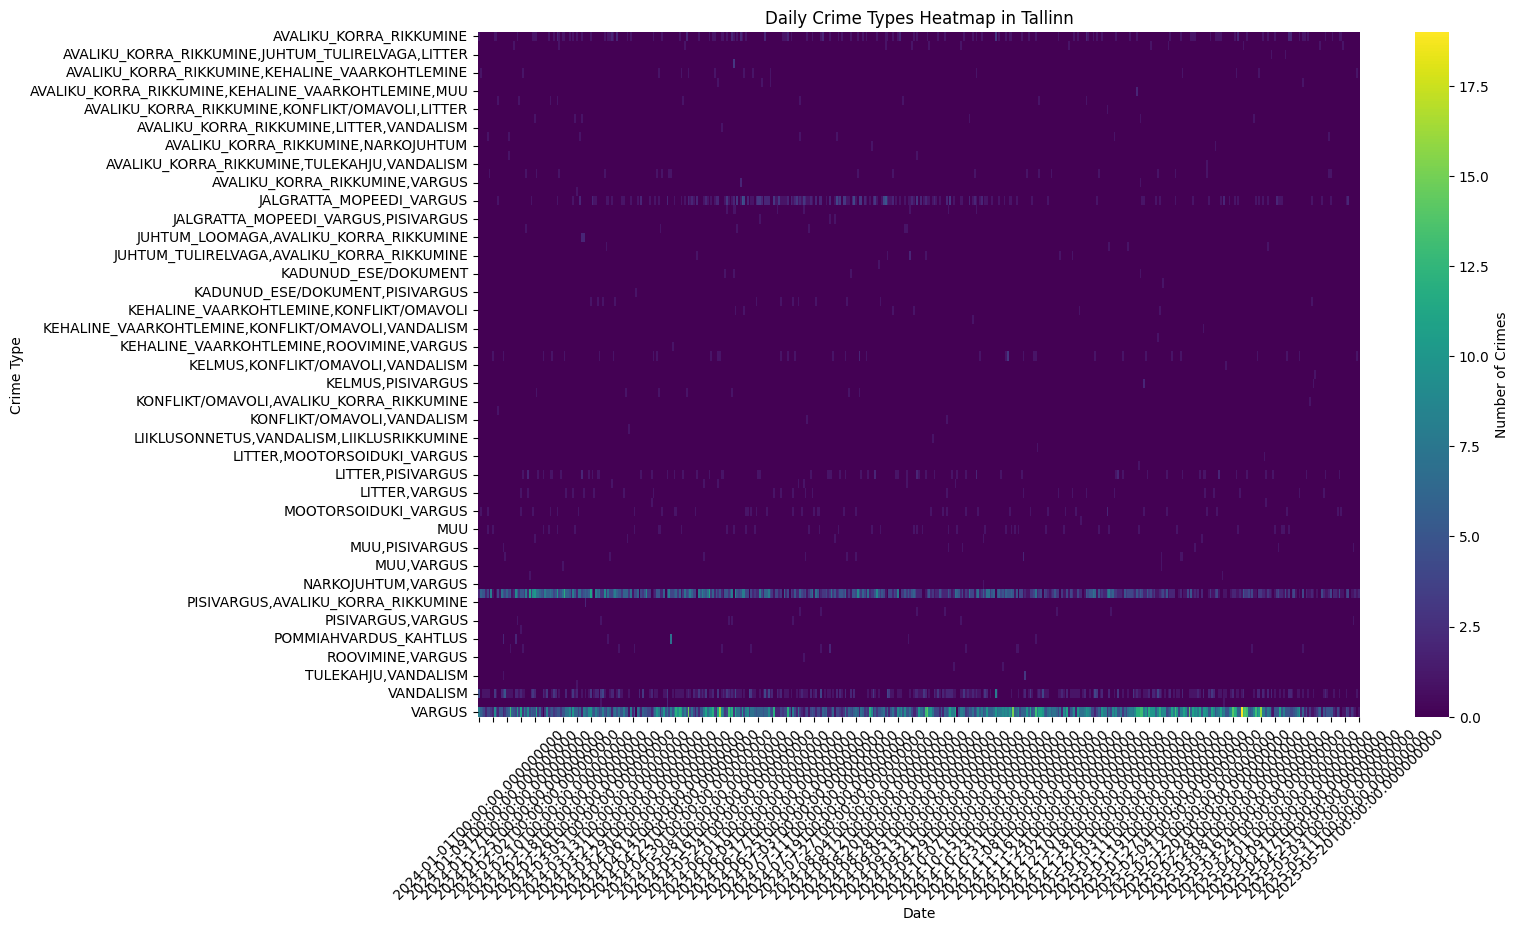

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/home/maria/CrimeStats/data/avalik_1(1).csv"
dat = pd.read_csv(file_path, sep='\t')

# Filter for crimes in Tallinn
tallinn = dat[dat['ValdLinnNimetus'] == 'Tallinn']

# Parse the date and time columns
tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')
tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')
tallinn['ToimKell'] = pd.to_timedelta(tallinn['ToimKell'] + ':00')

# Combine into a single datetime column
tallinn['ToimDatetime'] = tallinn['ToimKpv'] + tallinn['ToimKell']
tallinn = tallinn.dropna(subset=['ToimDatetime'])
tallinn.set_index('ToimDatetime', inplace=True)

# Get daily counts for each crime type
daily_crime_matrix = tallinn.groupby([pd.Grouper(freq='D'), 'SyndmusLiik']).size().unstack(fill_value=0)

# Sort columns alphabetically for consistency
daily_crime_matrix = daily_crime_matrix.sort_index(axis=1)

# Plot as heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(daily_crime_matrix.T, cmap="viridis", cbar_kws={'label': 'Number of Crimes'})
plt.title("Daily Crime Types Heatmap in Tallinn")
plt.xlabel("Date")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [3]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Transpose so rows = days, columns = crime types
X = daily_crime_matrix.fillna(0).values  # shape (num_days, num_crime_types)

# Fit PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

0.5331401597154323 SyndmusLiik
VARGUS                               0.999017
VANDALISM                            0.035627
JALGRATTA_MOPEEDI_VARGUS            -0.019720
LITTER,PISIVARGUS                   -0.008407
AVALIKU_KORRA_RIKKUMINE              0.006971
PISIVARGUS                           0.006029
MUU                                 -0.004849
LITTER,VARGUS                        0.004491
MOOTORSOIDUKI_VARGUS                -0.004026
AVALIKU_KORRA_RIKKUMINE,VANDALISM    0.003626
dtype: float64


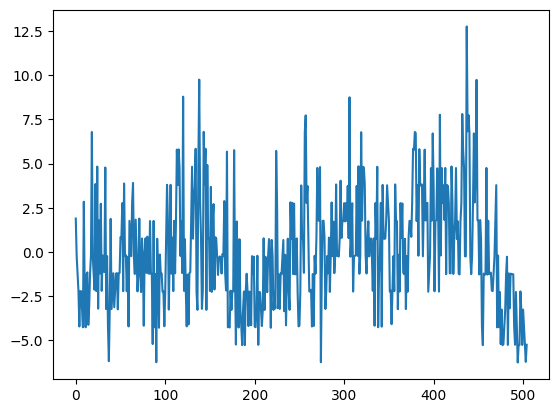

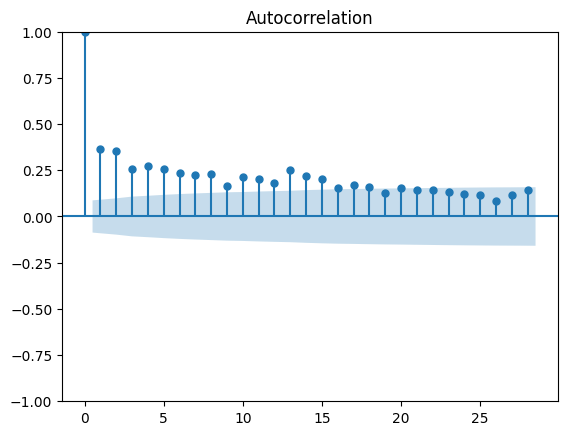

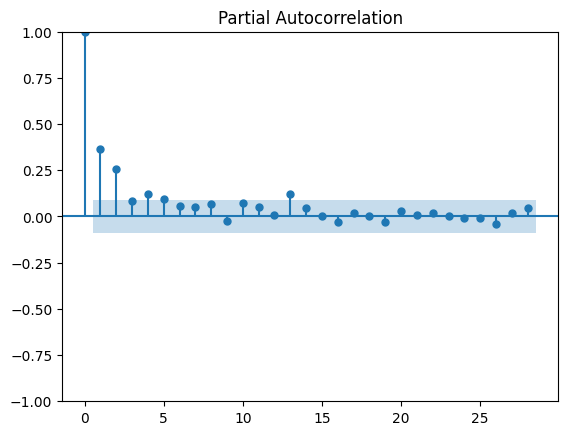

In [10]:
def print_pcs_info(pca, component):
    # 1. Get the explained variance ratio for the first component
    explained_variance_pc = pca.explained_variance_ratio_[component]

    # 2. Get the loadings (contributions of original variables to PC1)
    pc_loadings = pd.Series(pca.components_[component], index=daily_crime_matrix.columns)

    # Sort by absolute magnitude to see most influential crime types
    pc_sorted = pc_loadings.sort_values(key=abs, ascending=False)

    # Display top contributors and explained variance
    explained_variance_pc, pc_sorted.head(10)

    import matplotlib.pyplot as plt

    plt.plot(X_pca[:,component])

    print(explained_variance_pc, pc_sorted.head(10))
    plot_acf(X_pca[:,component])
    plot_pacf(X_pca[:,component])

print_pcs_info(pca, 0)

0.2938948418757587 SyndmusLiik
PISIVARGUS                                    0.998934
JALGRATTA_MOPEEDI_VARGUS                      0.031129
AVALIKU_KORRA_RIKKUMINE                       0.021570
VANDALISM                                    -0.016897
POMMIAHVARDUS_KAHTLUS                         0.009661
MOOTORSOIDUKI_VARGUS                          0.005432
JUHTUM_TULIRELVAGA,AVALIKU_KORRA_RIKKUMINE   -0.005182
KONFLIKT/OMAVOLI                              0.005013
VARGUS                                       -0.004957
KELMUS                                        0.004939
dtype: float64


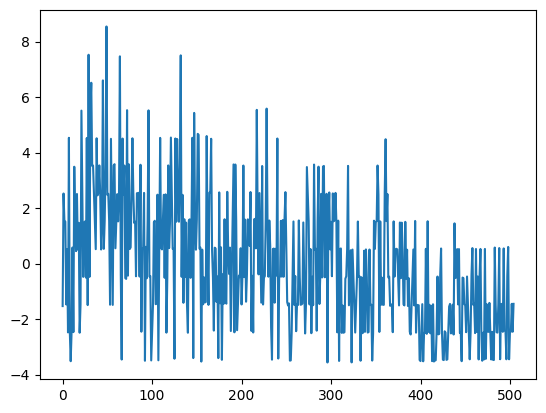

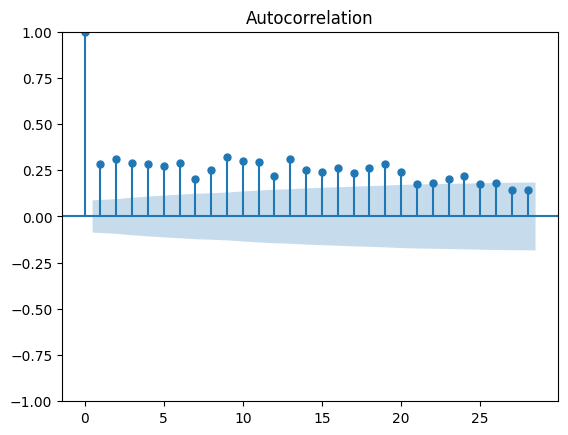

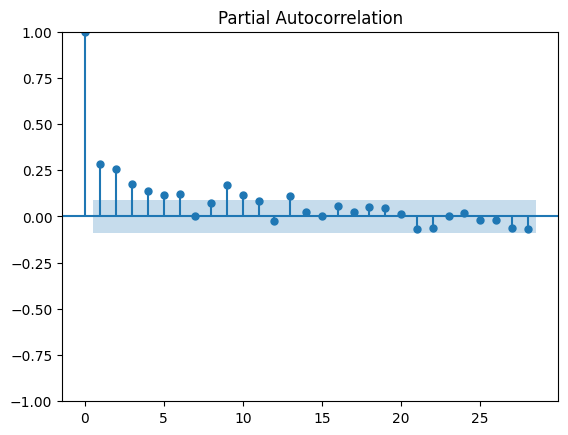

In [11]:
print_pcs_info(pca, 1)

0.059214287299768985 SyndmusLiik
VANDALISM                                     0.982988
JALGRATTA_MOPEEDI_VARGUS                      0.137087
AVALIKU_KORRA_RIKKUMINE                       0.106051
VARGUS                                       -0.033062
MOOTORSOIDUKI_VARGUS                         -0.023713
JALGRATTA_MOPEEDI_VARGUS,LITTER               0.017996
AVALIKU_KORRA_RIKKUMINE,VANDALISM            -0.016052
LITTER,PISIVARGUS                             0.014567
VANDALISM,VARGUS                              0.011890
AVALIKU_KORRA_RIKKUMINE,JUHTUM_TULIRELVAGA   -0.010382
dtype: float64


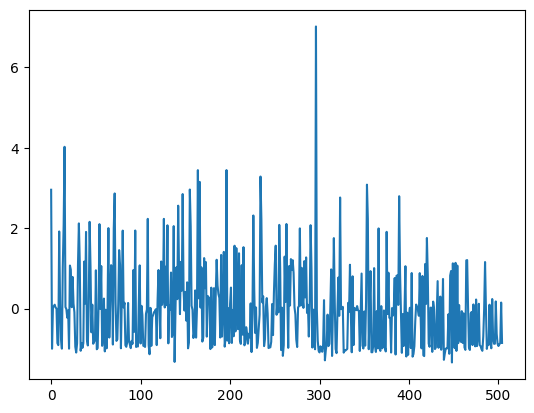

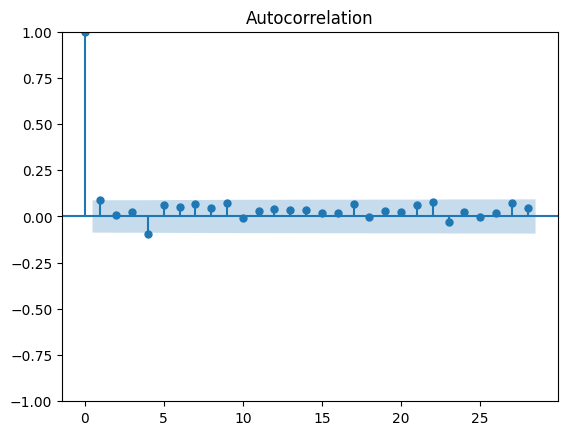

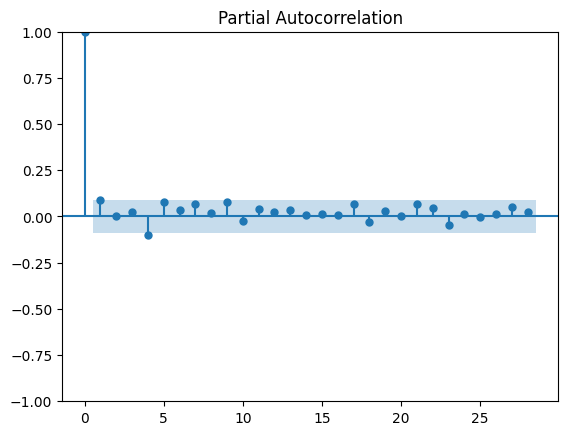

In [12]:
print_pcs_info(pca, 2)

0.04158708407533225 SyndmusLiik
JALGRATTA_MOPEEDI_VARGUS                                     0.988118
VANDALISM                                                   -0.137757
PISIVARGUS                                                  -0.032727
LITTER,PISIVARGUS                                            0.028079
VARGUS                                                       0.024944
POMMIAHVARDUS_KAHTLUS                                       -0.017517
JALGRATTA_MOPEEDI_VARGUS,LITTER                              0.013538
AVALIKU_KORRA_RIKKUMINE,KEHALINE_VAARKOHTLEMINE              0.012401
AVALIKU_KORRA_RIKKUMINE,JUHTUM_TULIRELVAGA,MUU,PISIVARGUS    0.011654
JUHTUM_TULIRELVAGA,AVALIKU_KORRA_RIKKUMINE                   0.011319
dtype: float64


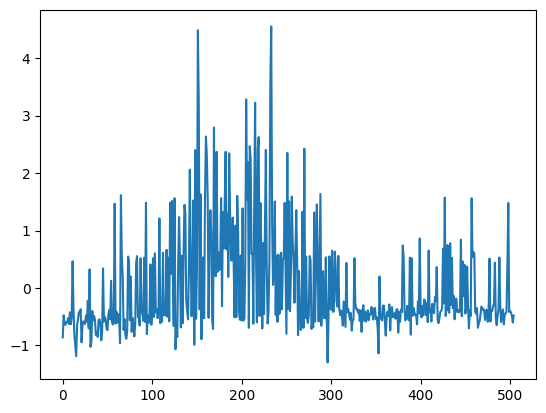

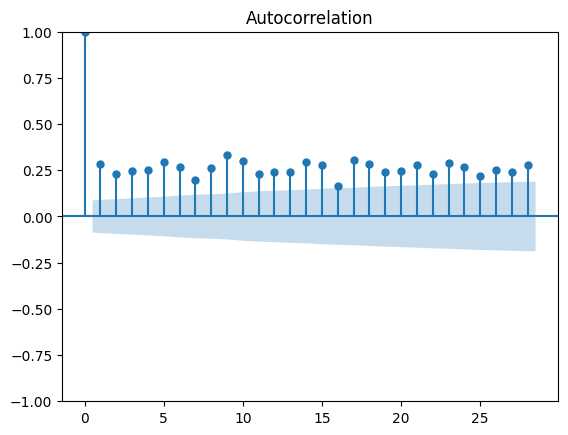

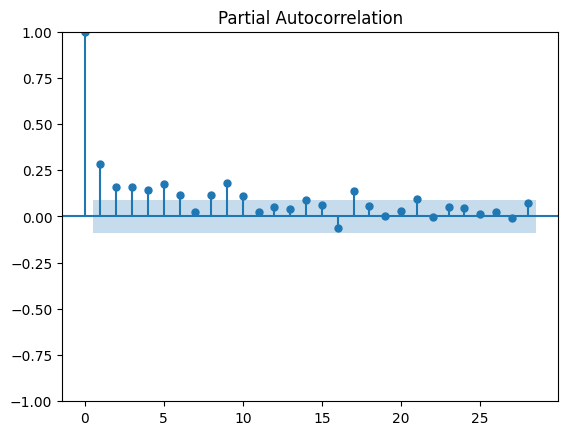

In [13]:
print_pcs_info(pca, 3)

0.013598034080347899 SyndmusLiik
AVALIKU_KORRA_RIKKUMINE                                      0.988853
VANDALISM                                                   -0.104223
MUU                                                          0.065171
POMMIAHVARDUS_KAHTLUS                                       -0.028632
MOOTORSOIDUKI_VARGUS                                        -0.026554
KONFLIKT/OMAVOLI                                             0.026032
AVALIKU_KORRA_RIKKUMINE,VARGUS                               0.024591
KEHALINE_VAARKOHTLEMINE                                     -0.022327
PISIVARGUS                                                  -0.022293
AVALIKU_KORRA_RIKKUMINE,JUHTUM_TULIRELVAGA,MUU,PISIVARGUS    0.021544
dtype: float64


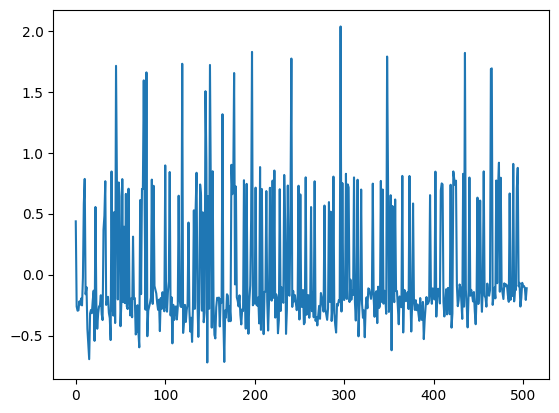

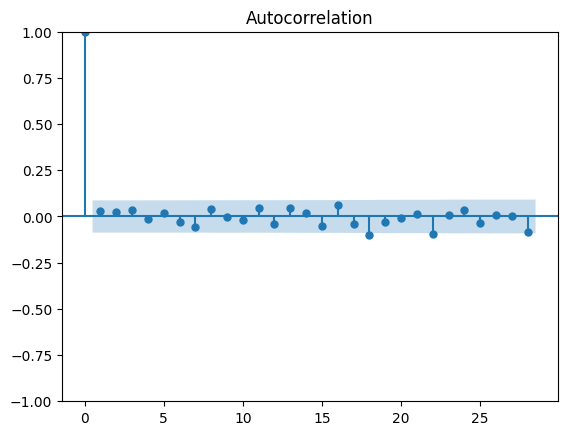

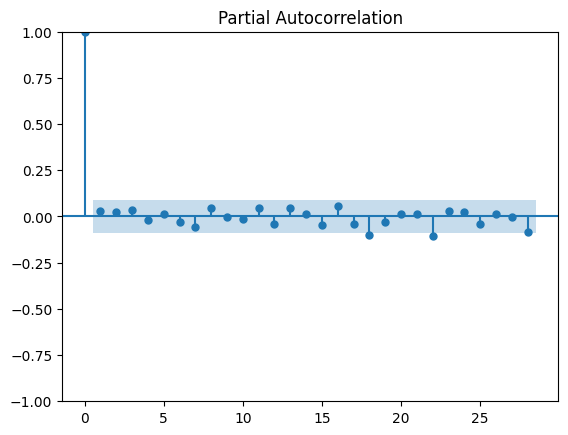

In [14]:
print_pcs_info(pca, 4)

0.007885143148807046 SyndmusLiik
LITTER,PISIVARGUS                                  0.979616
POMMIAHVARDUS_KAHTLUS                             -0.132378
AVALIKU_KORRA_RIKKUMINE,VANDALISM                 -0.060904
JUHTUM_LOOMAGA,AVALIKU_KORRA_RIKKUMINE             0.053587
ROOVIMINE                                          0.050592
MOOTORSOIDUKI_VARGUS                              -0.049625
AVALIKU_KORRA_RIKKUMINE,KEHALINE_VAARKOHTLEMINE    0.049216
MUU                                               -0.035041
JALGRATTA_MOPEEDI_VARGUS                          -0.033379
AVALIKU_KORRA_RIKKUMINE,JUHTUM_TULIRELVAGA        -0.028180
dtype: float64


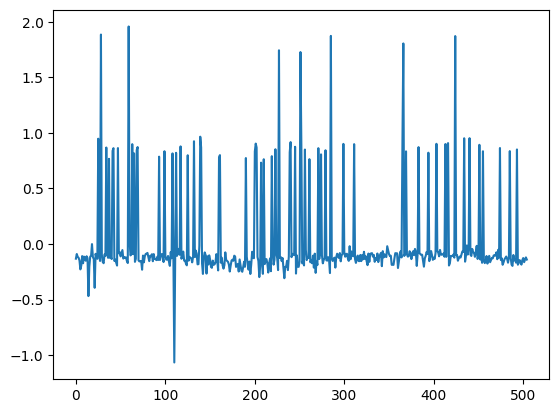

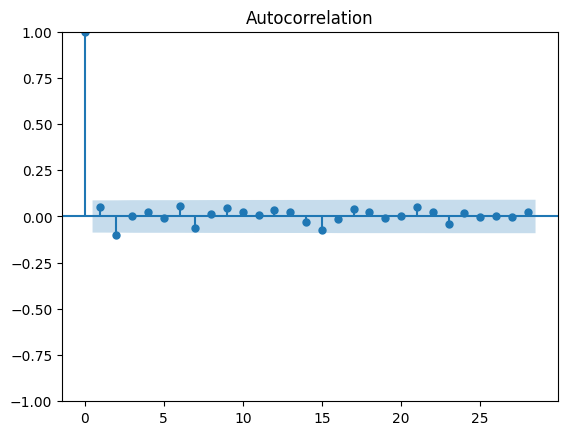

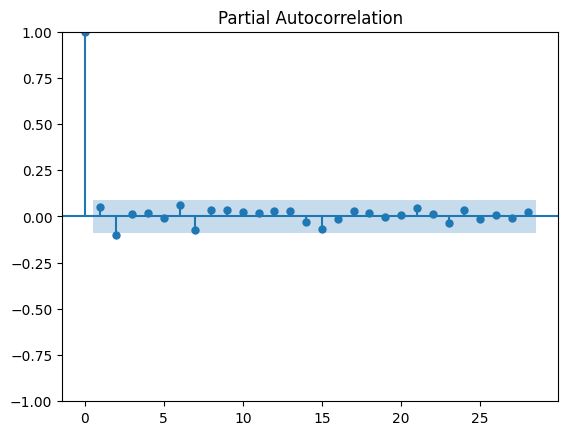

In [15]:
print_pcs_info(pca, 5)